In [1]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

In [3]:
def posterior(bo, x, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

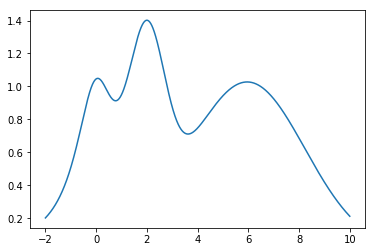

In [4]:
x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y)

In [5]:
bo = BayesianOptimization(target, {'x': (-2, 10)})

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.23233 |    9.8784 | 
    2 | 00m00s |    1.38694 |    1.8685 | 
    3 | 00m00s |    0.97198 |    1.0617 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    4 | 00m00s |    1.00148 |    5.4365 | 
    5 | 00m00s |    0.20166 |   -2.0000 | 
    6 | 00m00s |    0.71117 |    3.6490 | 
    7 | 00m00s |    0.80590 |    7.5410 | 
    8 | 00m00s |    0.79640 |   -0.5300 | 


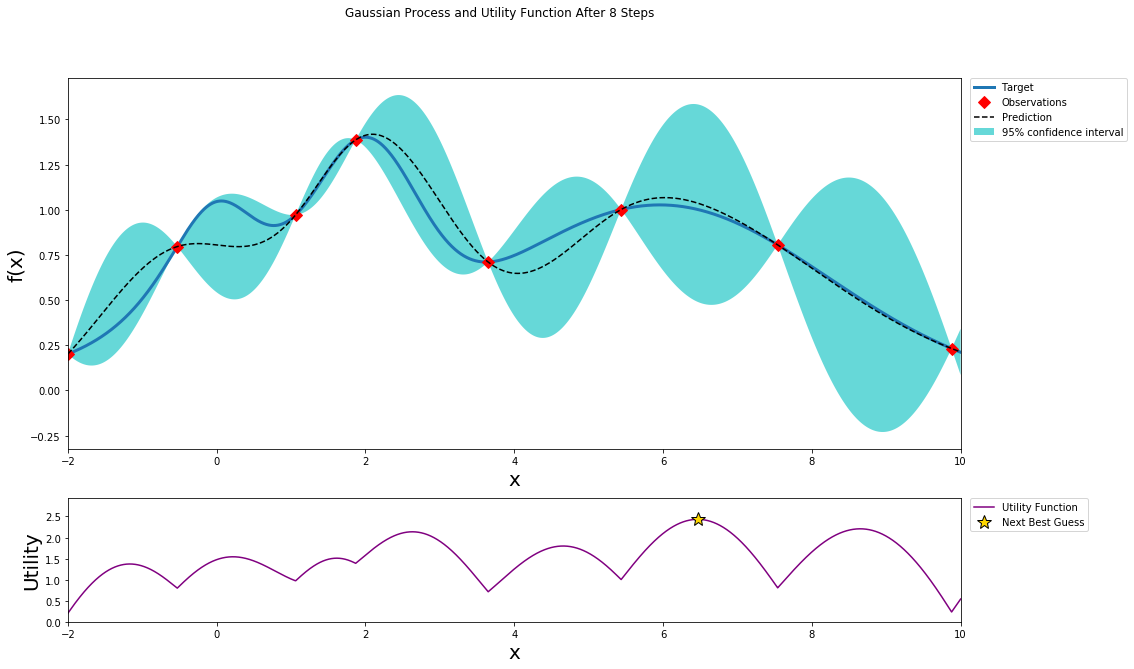

In [6]:
bo.maximize(init_points=3, n_iter=5, acq='ucb', kappa=5)
plot_gp(bo, x, y)

In [7]:
bo = BayesianOptimization(lambda x, y: -x ** 2 - (y - 1) ** 2 + 1,
                          {'x': (-4, 4), 'y': (-3, 3)})

In [8]:
bo.explore({'x': [-1, 3], 'y': [-2, 2]})

In [9]:
bo.initialize(
    {
        'target': [-1, -1],
        'x': [1, 1],
        'y': [0, 2]
    }
)

In [10]:
bo.maximize(init_points=5, n_iter=15, kappa=2)

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
    1 | 00m00s |   -9.00000 |   -1.0000 |   -2.0000 | 
    2 | 00m00s |   -9.00000 |    3.0000 |    2.0000 | 
    3 | 00m00s |    0.60449 |   -0.1605 |    1.6081 | 
    4 | 00m00s |   -6.08553 |   -2.0048 |    2.7511 | 
    5 | 00m00s |  -13.93642 |   -3.7122 |    2.0753 | 
    6 | 00m00s |   -1.10165 |    1.0936 |    1.9517 | 
    7 | 00m00s |  -11.72270 |    1.9740 |   -1.9709 | 
    8 | 00m00s |   -1.00000 |    1.0000 |    0.0000 | 
    9 | 00m00s |   -1.00000 |    1.0000 |    2.0000 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
   10 | 00m01s |    0.89060 |    0.3222 |    0.9254 | 
   11 | 00m01s |    0.97746 |   -0.1496 |    0.9868 | 
   12 | 00m01s |    0.95485 |    0.0688 |    1.2010 | 
   13 | 00m02s |    0.94748 |    0.0460 |    0.7755 | 
   14 | 00m02s |    0.99882 | 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   20 | 00m08s |    0.99982 |   -0.0128 |    1.0044 | 
   21 | 00m09s |    0.99998 |    0.0041 |    1.0000 | 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00467993]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   22 | 00m06s |    0.99968 |   -0.0178 |    1.0011 | 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.33265403e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00024425]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   23 | 00m06s |    0.99952 |    0.0204 |    0.9921 | 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.94828026e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   24 | 00m04s |    0.99929 |   -0.0267 |    1.0002 | 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00014679]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-17.35730032]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 40, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


In [11]:
bo.explore({'x': [0.6], 'y': [-0.23]})

In [12]:
gp_params = {'kernel': None,
             'alpha': 1e-5}

In [13]:
bo.maximize(n_iter=5, acq='ei', **gp_params)

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         x |         y | 
   25 | 00m01s |  -31.00000 |   -4.0000 |   -3.0000 | 
   26 | 00m01s |  -17.08093 |    4.0000 |   -0.4425 | 
   27 | 00m01s |   -4.88294 |   -2.2056 |   -0.0092 | 
   28 | 00m00s |  -31.00000 |    4.0000 |   -3.0000 | 
   29 | 00m00s |    0.99974 |    0.0121 |    1.0105 | 


In [15]:
x=10

In [17]:
y = lambda x: int(x) if int(x)!=0 else 1


10